Imports

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

## data loading

In [89]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True,
                                        transform=transforms.ToTensor())
# transforming the data to tensor as they are in PIL format


Files already downloaded and verified


In [90]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [91]:
# remeber we are not loading here. We are only creating a dataset to load the data
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True) #shuffling the data is important here


In [92]:
dataiterator = iter(trainloader) # to access trainloader we create an iterator over it

images, labels = next(dataiterator) # will return first batch of images, batches will be same as what we have specified in Dataloader

print(images.shape)  #batchsize, channels, image dimensions

print(images[0].shape) #channels, image dimensions

print(labels[0].item()) # gives the label

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
2


## visualize data

In [93]:
# now accessing the first image

img = images[0]

# to plot it we have to convert it to numpy

npimg = img.numpy()
print(npimg.shape) # same dimensions as above

(3, 32, 32)


(32, 32, 3)


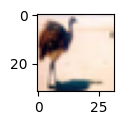

In [94]:
# to be able to plot this image we need to have it as x,y,x and hence have to transpose it

npimg = np.transpose(npimg, (1,2,0)) #we make first index as x, second index as y and 0th index as z for it to become like a normal image
print(npimg.shape)

# now plot it

plt.figure(figsize=(1,1))
plt.imshow(npimg) # supposed to be a dog as class 5
plt.show()

In [95]:
def plot_img(img):
    npimg = img.numpy()
    npimg = np.transpose(npimg, (1,2,0))
    plt.figure(figsize=(5,5))
    plt.imshow(npimg)

bird truck frog dog


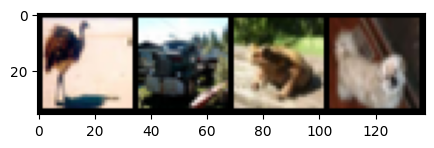

In [96]:
plot_img(torchvision.utils.make_grid(images)) # make the grid of images of the batch
print(' '.join(classes[labels[j]] for j in range(4))) # also print classes of the images

### Single Conv Layer

In [ ]:
class FirstCNN(nn.Module):  #inherit the class nn.module
  def __init__(self):
    super(FirstCNN, self).__init__() # call init of parent class
    self.conv1 = nn.Conv2d(3, 16, 5) # input channels, output channels, kernel size(can be also written as tuple)

  def forward(self, x):
    x = self.conv1(x)
    return x

In [ ]:
net = FirstCNN()

In [ ]:
output = net(images)
output.shape #batchsize, output channels or no of kernels/filters applied, result of conv output as 32x32 has shrunk now bcoz of no padding


torch.Size([4, 16, 28, 28])

In [ ]:
for param in net.parameters():
  print(param.shape) #no of kernels, input 3 channels, and last 2 nos correspond to kernel size
  #next print is for bias as eac kernel has a bias

torch.Size([16, 3, 5, 5])
torch.Size([16])


(28, 28)


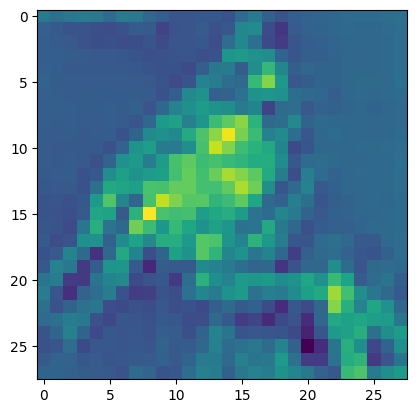

In [ ]:
# now i want to look at output of one channel
""" why use detach?
    as you cannot use numpy operations on the tensors with gradient as it will cause memory mamnegment issues.
    Hence we first stop tracking the autograd computations and then convert it to numpy
"""
out1 = output[0,0,:,:].detach().numpy() #0th batch, 0th channel out of 16 kernel applied, all the shrunken dimernsions
print(out1.shape)
plt.imshow(out1)
plt.show()

# this is for 0th image which was a dog. So 0 channels learns somethings like this for the dog
# whatever is being lightened up is being preserved

### Deep Conv Network

In [ ]:
class FirstCNN_v2(nn.Module): #inherit the class nn.module
  def __init__(self):
    super(FirstCNN_v2, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 8 , 3),  # (N, 3, 32, 32) -> (N, 8, 30, 30)
        nn.Conv2d(8, 16 , 3) # prev channel output, output channels, kernel size(can be also written as tuple) (N, 8, 30, 30) -> (N, 16, 28, 28)
    )

  def forward(self, x):
    x= self.model(x)
    return x


In [ ]:
deep_net = FirstCNN_v2()
output  = deep_net(images)
output.shape #batchsize, output channels or no of kernels/filters applied, result of conv output as 32x32 has shrunk now bcoz of no padding

torch.Size([4, 16, 28, 28])

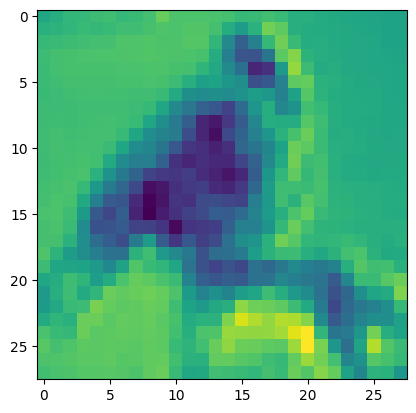

In [ ]:
plt.imshow(output[0, 15, :, :].detach().numpy())

### Deep Conv Net with Pooling

In [ ]:
class FirstCNN_v3(nn.Module):
  def __init__(self):
    super(FirstCNN_v3, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 6, 5), # (N, 3, 32, 32) -> (N, 6, 28, 28)
        # avg pooling does not change the no of channel but half the image size as we have no overlap on the avg kernel
        nn.AvgPool2d(2, stride=2),  #corresponds to what size of averaging kernel i am looking at, how much stride is present (N, 6, 28, 28) -> (N, 6, 14, 14)
        nn.Conv2d(6, 16, 5), #(N, 6, 14, 14) -> (N, 16, 10, 10)
        nn.AvgPool2d(2, stride=2) #(N, 16, 10, 10) -> (N, 16, 5, 5)
    )
  def forward(self, x):

    x = self.model(x)
    return x

In [ ]:
net = FirstCNN_v3()
output = net(images)
output.shape

torch.Size([4, 16, 5, 5])

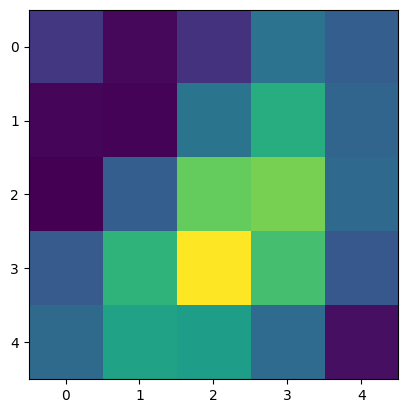

In [ ]:
plt.imshow(output[0, 0, :,:].detach().numpy())

### Coding Lenet (the one by Yan LeCun)

In [ ]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3, 6, 5), # (N, 3, 32, 32) - > (N, 6, 28, 28)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N, 6, 14, 14)
        nn.Conv2d(6, 16, 5),  # (N, 6, 14, 14) -> (N, 6, 10, 10)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2) ## N, 16, 10, 10) -> (N, 16, 5, 5)  this will be flattened before sending it to FC layer
    )
    self.fc_model = nn.Sequential(
        nn.Linear(16*5*5, 120), #output from last layer of cnn goes as input
        nn.Tanh(),
        nn.Linear(120, 84),
        nn.Tanh(),
        nn.Linear(84, 10)
    )
  def forward(self, x):
    # print("input to cnn model: ", x.shape)
    x = self.cnn_model(x)
    # print("output of cnn model: ", x.shape)
    # we can do the flattening in the fc model but it is not recommended
    x = x.view(x.size(0), -1) #flattening of the last cnn layer such that their is same dimension on the first index(N = batch size) and everything is collapsed into 1 index which becomes 16*5*5
    # print("shape after flattening: ",x.shape)
    x= self.fc_model(x)
    # print("output shape: ", x.shape)
    return x
  ## no softmax as we are just using it for inference


In [ ]:
lenet = LeNet()
output = lenet(images)


input to cnn model:  torch.Size([4, 3, 32, 32])
output of cnn model:  torch.Size([4, 16, 5, 5])
shape after flattening:  torch.Size([4, 400])
output shape:  torch.Size([4, 10])


In [ ]:
output  #output for each of the image and their classes. Max of them will be the prediction

tensor([[-0.0475,  0.0126, -0.0739, -0.0893, -0.0535, -0.0520, -0.0384,  0.0665,
         -0.1056, -0.0446],
        [-0.0223,  0.0161, -0.0595, -0.0966, -0.0477, -0.0468, -0.0193,  0.0630,
         -0.1228, -0.0496],
        [-0.0336,  0.0278, -0.0727, -0.0935, -0.0486, -0.0436, -0.0347,  0.0555,
         -0.1033, -0.0649],
        [-0.0277,  0.0149, -0.0763, -0.0858, -0.0504, -0.0639, -0.0530,  0.0594,
         -0.1271, -0.0500]], grad_fn=<AddmmBackward0>)

In [ ]:
#output.data access raw data of the tensor, excluding the computation graph for automatic differentiation
#get which value was max and the class associated with it, 1 is for axis which would means column
max_values, pred_class = torch.max (output.data, 1)
print("max_values: ", max_values)
print("pred_class: ", pred_class)


max_values:  tensor([0.0665, 0.0630, 0.0555, 0.0594])
pred_class:  tensor([7, 7, 7, 7])


### Training LeNet

In [ ]:
batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True,
                                        transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size= batch_size, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True,
                                        transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size= batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [79]:
def model_evaluation(dataloader):
  total, correct = 0,0
  #iterating over batches of data in dataloader
  for data in dataloader:
    images, labels = data
    outputs = model(images)
    max_values, pred_class = torch.max(outputs.data, 1)
    total += pred_class.size(0)
    # print(pred_class.size())
    correct += (pred_class == labels).sum().item()
  return 100*correct/total


In [80]:
import torch.optim as optim
model = LeNet()

loss_fn = nn.CrossEntropyLoss() # using cross entropy loss
optimizer = optim.Adam(model.parameters())

Epoch: 0/10, Test accuracy is: 35.88, Train accuracy is: 36.15
Epoch: 1/10, Test accuracy is: 43.53, Train accuracy is: 43.65
Epoch: 2/10, Test accuracy is: 46.80, Train accuracy is: 47.35
Epoch: 3/10, Test accuracy is: 49.41, Train accuracy is: 50.58
Epoch: 4/10, Test accuracy is: 51.09, Train accuracy is: 52.96
Epoch: 5/10, Test accuracy is: 52.01, Train accuracy is: 54.93
Epoch: 6/10, Test accuracy is: 53.86, Train accuracy is: 56.98
Epoch: 7/10, Test accuracy is: 54.51, Train accuracy is: 58.24
Epoch: 8/10, Test accuracy is: 54.34, Train accuracy is: 59.07
Epoch: 9/10, Test accuracy is: 54.90, Train accuracy is: 60.47


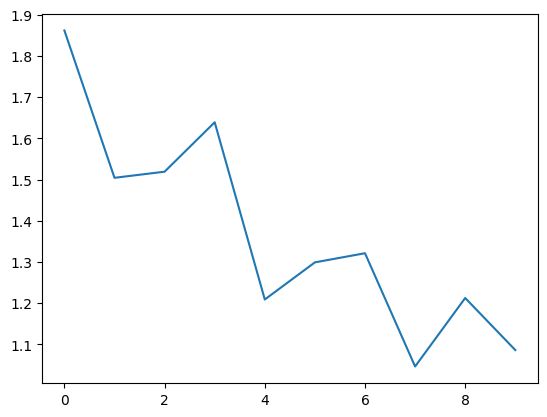

CPU times: user 6min 43s, sys: 834 ms, total: 6min 44s
Wall time: 6min 50s


In [81]:

%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 10

for epoch in range(max_epochs):
  #ierate over trainloader each time
  for i, data in enumerate(trainloader, 0):
    images, labels = data

    # print(len(labels))

    optimizer.zero_grad() #reset any orev gradient

    outputs = model(images)
    loss = loss_fn(outputs, labels)
    loss.backward()
    #update the parameters after loss
    optimizer.step()

    loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())

  print('Epoch: %d/%d, Test accuracy is: %0.2f, Train accuracy is: %0.2f'  % (epoch, max_epochs, model_evaluation(testloader), model_evaluation(trainloader)))

plt.plot(loss_epoch_arr)
plt.show()

## GPU

In [82]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [83]:
def gpu_model_evaluation(dataloader):
  total,correct = 0
  for data in dataloader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    max_value, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct+= (preds == labels).sum().item()
    return 100*correct/total

In [84]:
model = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [78]:
%%time
max_epochs = 12

for epoch in range(max_epochs):
  for i, data in enumerate(trainloader, 0):
    images, labels = data
    images, labels = images.to(device), labels.to(device)

    optimizer.zero_grad()
    outputs = model(images)
    loss = loss_fn(outputs, labels)
    loss.backward()
    optimizer.step()
  print('Epoch: %d/%d'  % (epoch, max_epochs))

Epoch: 0/12
Epoch: 1/12
Epoch: 2/12
Epoch: 3/12
Epoch: 4/12
Epoch: 5/12
Epoch: 6/12
Epoch: 7/12
Epoch: 8/12
Epoch: 9/12
Epoch: 10/12
Epoch: 11/12
CPU times: user 4min 33s, sys: 539 ms, total: 4min 34s
Wall time: 4min 41s


In [85]:
print("Test accuracy is: %0.2f, Train accuracy is: %0.2f"  % (gpu_model_evaluation(testloader), gpu_model_evaluation(trainloader)))

Test accuracy is: 10.00, Train accuracy is: 10.00


## Visualization

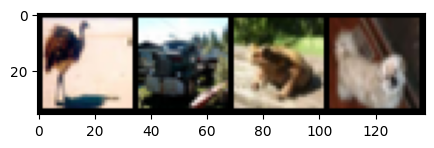

In [97]:
plot_img(torchvision.utils.make_grid(images))

In [100]:
model = model.to('cpu')

In [101]:
out = model(images)

In [102]:
output = model.cnn_model[0](images) # accessing model's cnn model, [0] is for first Conv2d layer
output.shape

torch.Size([4, 6, 28, 28])

<Figure size 100x100 with 0 Axes>

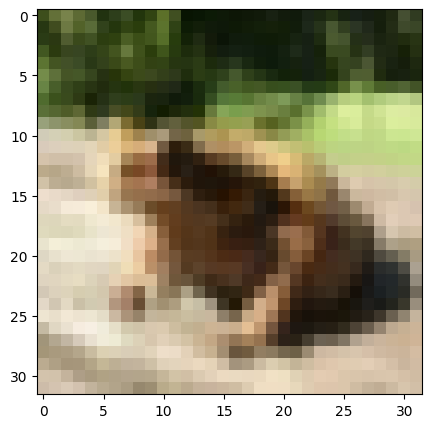

In [106]:
#plotting just one image from the batch
image_id =2
plt.figure(figsize = (1,1))
plot_img(images[image_id])

### plotting first layer of cnn model in LeNet

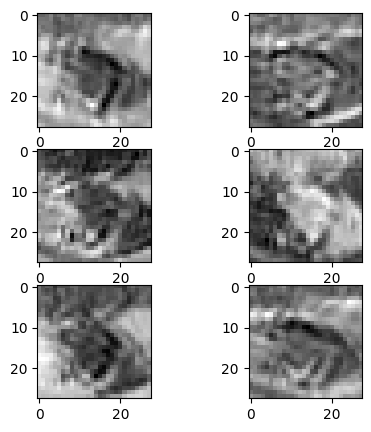

In [110]:
plt.figure(figsize = (5,5))
plt.subplot(321)  #3 rows 2 columns
for i in range(6):
  ax1 = plt.subplot(3, 2 , i+1)
  plt.imshow(output[image_id, i, :, :].detach().numpy(), cmap = 'binary')
  # plt.tight_layout()
plt.show()
